<AxesSubplot:xlabel='state'>

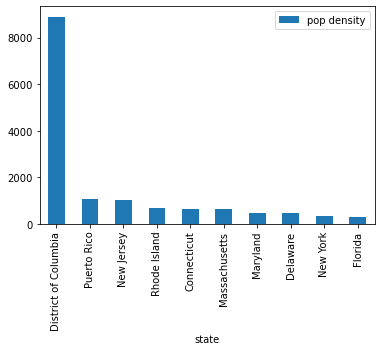

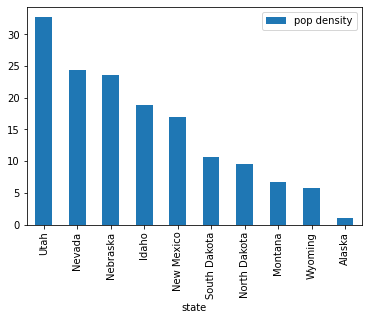

In [12]:
import pandas as pd
import os; os.system('clear')
import matplotlib.pyplot as plt

pop = pd.read_csv('state-population2.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
# abbrevs.loc[len(abbrevs.index)] = ['Puerto Rico', 'PR']

#merging
merge1 = pd.merge(areas, abbrevs, on="state")
pop = pop.rename(columns={'state/region': 'abbreviation'})
merge = pd.merge(pop, merge1, on='abbreviation')
merge = merge[merge['ages'] != 'under18']
merge = merge[merge['year'] == 2010]
merge['pop density'] = merge['population'] / merge['area (sq. mi)']
merge = merge.sort_values(by = 'pop density', ascending = False)
merge.reset_index(level=0, inplace = True)
top10 = merge.drop(range(10,52))
bottom10 = merge.drop(range(0,42))

# print(top10)
# print(bottom10)

top10.plot.bar(x = 'state', y = 'pop density')
bottom10.plot.bar(x = 'state', y = 'pop density')